# MIE 1624 Assignment 2

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import statistics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

### Load data

In [2]:
df= pd.read_csv('Kaggle_Salary.csv')
df

C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,73,77,81,94,96,109,114,115,130,139,146,147,153,154,167,171,175,180,193,206,212,219,224,228,231,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,NaN,NaN
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3.0,"30,000-39,999"
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14.0,">250,000"
4,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12493,346,22-24,Male,-1,India,Bachelor’s degree,Data Scientist,-1,50-249 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
12494,88,25-29,Prefer not to say,-1,Austria,No formal education past high school,Data Scientist,-1,250-999 employees,1-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
12495,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"
12496,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0,"0-9,999"


# Part 1: Data cleaning

### Data Exploration and preprocessing

By data explorations, the following steps are taken at the beginning:
1. Drop the row of questions
2. Drop the columns including targets(i.e. 'Q10','Q10_Encoded','Q10_buckets')
3. Drop column 'Q14' because its results have alrealy been encoded into other columns of Q14 answers.

In [3]:
# drop the row of questions
df = df.drop([0])

# save targets to df_target
df_target = df['Q10_Encoded']

# drop column "Q14" and targets "Q10" ,"Q10_Encoded", "Q10_buckets"
df.drop(['Q14','Q10','Q10_Encoded','Q10_buckets'], axis=1, inplace=True)

Data is splitted into three groups to further process:
1. categorial features without orders
2. categorial features with orders
3. selected choice and other texts columns

Note: 'Q4' and 'Q8' also contain some hierarchies. However, those hierarchies are not able to be determined subjectively.

In [4]:
df_one_hot_encoded = df[['Q3','Q4','Q2','Q5','Q8','Q19']]
df_label_encoded = df[['Q1','Q6','Q7','Q11','Q15','Q22','Q23']]
df.drop(['Q3','Q4','Q2','Q5','Q19','Q1','Q6','Q7','Q8','Q11','Q15','Q22','Q23'], axis=1, inplace=True)

### Handle missing values

Check number of nulls in categorial data

In [5]:
df_one_hot_encoded.isnull().sum()

Q3        0
Q4        0
Q2        0
Q5        0
Q8        0
Q19    1844
dtype: int64

In [6]:
df_label_encoded.isnull().sum()

Q1        0
Q6        0
Q7        0
Q11     247
Q15    1075
Q22    1947
Q23    1956
dtype: int64

Check the proportions of valid entries of each column with nulls

In [7]:
df_one_hot_encoded['Q19'].value_counts(normalize=True)

Python        0.769736
R             0.100723
SQL           0.069089
C++           0.012015
MATLAB        0.010795
Other         0.010607
C             0.007885
Java          0.006571
None          0.005726
Javascript    0.003473
Bash          0.002910
TypeScript    0.000469
Name: Q19, dtype: float64

In [8]:
df_label_encoded['Q11'].value_counts(normalize=True)

$0 (USD)             0.329633
$100-$999            0.190612
$1000-$9,999         0.173306
$1-$99               0.121224
$10,000-$99,999      0.103510
> $100,000 ($USD)    0.081714
Name: Q11, dtype: float64

In [9]:
df_label_encoded['Q15'].value_counts(normalize=True)

3-5 years                    0.246717
1-2 years                    0.237524
< 1 years                    0.179391
5-10 years                   0.153126
10-20 years                  0.087901
I have never written code    0.048328
20+ years                    0.047015
Name: Q15, dtype: float64

In [10]:
df_label_encoded['Q22'].value_counts(normalize=True)

Never         0.806825
Once          0.092512
2-5 times     0.075355
6-24 times    0.013744
> 25 times    0.011564
Name: Q22, dtype: float64

In [11]:
df_label_encoded['Q23'].value_counts(normalize=True)

< 1 years      0.291054
1-2 years      0.258704
2-3 years      0.148847
3-4 years      0.092496
4-5 years      0.081871
5-10 years     0.079025
10-15 years    0.031306
20+ years      0.016697
Name: Q23, dtype: float64

#### Missing values of categorical columns

For column 'Q19' and 'Q22', one of the entries are proportionally dominant, so it is reasonable to fill nulls with the mode of each column. For column 'Q11', 'Q15' and 'Q23', proportions of unique entries are relatively balanced. In this case, replacing nulls with modes is not a good idea. Instead, nulls are filled with 'Unknown' since their values are unpredictable.

In [12]:
df_one_hot_encoded['Q19'].fillna(df_one_hot_encoded['Q19'].mode()[0],inplace=True)
df_label_encoded['Q22'].fillna(df_label_encoded['Q22'].mode()[0],inplace=True)
df_label_encoded.loc[df_label_encoded['Q11'].isnull(), 'Q11'] = 'Unknown'
df_label_encoded.loc[df_label_encoded['Q15'].isnull(), 'Q15'] = 'Unknown'
df_label_encoded.loc[df_label_encoded['Q23'].isnull(), 'Q23'] = 'Unknown'

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate f

#### Missing values in selected choice and other texts columns

Check number of nulls in the rest columns and find that nulls only exist in the columns of "Selected Choice".

In [13]:
df.isnull().sum()

Time from Start to Finish (seconds)        0
Q2_OTHER_TEXT                              0
Q5_OTHER_TEXT                              0
Q9_Part_1                               6518
Q9_Part_2                               8990
                                       ...  
Q34_Part_9                             12018
Q34_Part_10                            11971
Q34_Part_11                            11252
Q34_Part_12                            12210
Q34_OTHER_TEXT                             0
Length: 231, dtype: int64

In each column of "Selected Choice", nulls indicate that this choice was not selected, and the rest entries are the same selected choice of this column. In this case, one-hot encoding can be applied on columns of "Selected Choice" to convert nulls to 0, and encode the selected choices corresponding to their columns as 1. 

In [14]:
for column in df.columns:
    
    # Only process the columns with nulls
    if df[column].isnull().sum() != 0: 
        
        df = pd.get_dummies(df, columns=[column], prefix=[column])

## Data encoding

### One-hot encoding

One-hot encoding is used to encode the features without orders. One advantage of one-hot encoding is that it treats all categories equivalent so there would be no order or hierarchy introduced into encoded values.

In [15]:
for column in df_one_hot_encoded.columns:
    
    # generate binary values using get_dummies
    df_one_hot_encoded = pd.get_dummies(df_one_hot_encoded, columns=[column], prefix=[column])
    
df_one_hot_encoded

,Q3_Algeria,Q3_Argentina,Q3_Australia,Q3_Austria,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,...,Q19_C++,Q19_Java,Q19_Javascript,Q19_MATLAB,Q19_None,Q19_Other,Q19_Python,Q19_R,Q19_SQL,Q19_TypeScript
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12494,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Label encoding

Label encoding is used to encode the features with orders. The values of encoding is customized column by column according to the hierarchies contained in original data. In order to assign reasonable values to 'Unknown's existing in label encoded data, all 'Unknown's will be encoded as the medium of each column.

One advantage of label encoding is that the orders or hierarchies existing in the original data can be introduced into encoded data so that the encoded values would also keep these orders or hierarchies. It is also easy to implement compared with one-hot encoding, while lack of data exploration might lead to unexpected orders in the data.

#### Q1 label encoding

In [16]:
df_label_encoded.Q1.unique() 

array(['22-24', '40-44', '50-54', '55-59', '30-34', '18-21', '35-39',
       '25-29', '45-49', '60-69', '70+'], dtype=object)

In [17]:
Q1_encode = ({'22-24':23, '40-44':42, '50-54':52, '55-59':57, '30-34':32, '18-21':20, '35-39':37,'25-29':27, '45-49':47, '60-69':65, '70+':70})
df_label_encoded.loc[1:,'Q1'] = df_label_encoded.loc[1:,'Q1'].map(Q1_encode)

#### Q6 label encoding

In [18]:
df_label_encoded.Q6.unique() 

array(['1000-9,999 employees', '> 10,000 employees', '0-49 employees',
       '50-249 employees', '250-999 employees'], dtype=object)

In [19]:
Q6_encode = ({'1000-9,999 employees':5000, '> 10,000 employees':10000, '0-49 employees':25,'50-249 employees':150, '250-999 employees':625})
df_label_encoded.loc[1:,'Q6'] = df_label_encoded.loc[1:,'Q6'].map(Q6_encode)

#### Q7 label encoding

In [20]:
df_label_encoded.Q7.unique() 

array(['0', '20+', '3-4', '1-2', '5-9', '10-14', '15-19'], dtype=object)

In [21]:
Q7_encode = ({'0':0, '20+':25, '3-4':4, '1-2':2, '5-9':7, '10-14':12, '15-19':17})
df_label_encoded.loc[1:,'Q7'] = df_label_encoded.loc[1:,'Q7'].map(Q7_encode)

#### Q11 label encoding

In [22]:
df_label_encoded.Q11.unique() 

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99', 'Unknown'], dtype=object)

In [23]:
Q11_encode = ({'$0 (USD)':0, '> $100,000 ($USD)':100000, '$10,000-$99,999':50000, '$100-$999':500, '$1000-$9,999':5000, '$1-$99':50, 'Unknown':2750})
df_label_encoded.loc[1:,'Q11'] = df_label_encoded.loc[1:,'Q11'].map(Q11_encode)

#### Q15 label encoding

In [24]:
df_label_encoded.Q15.unique() 

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years', 'Unknown'], dtype=object)

In [25]:
Q15_encode = ({'1-2 years':2, 'I have never written code':0, '< 1 years':1, '20+ years':25,'3-5 years':4, '5-10 years':8, '10-20 years':15, 'Unknown':4})
df_label_encoded.loc[1:,'Q15'] = df_label_encoded.loc[1:,'Q15'].map(Q15_encode)

#### Q22 label encoding

In [26]:
df_label_encoded.Q22.unique() 

array(['Never', 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

In [27]:
Q22_encode = ({'Never':0, 'Once':1, '6-24 times':15, '2-5 times':4, '> 25 times':30})
df_label_encoded.loc[1:,'Q22'] = df_label_encoded.loc[1:,'Q22'].map(Q22_encode)

#### Q23 label encoding

In [28]:
df_label_encoded.Q23.unique() 

array(['1-2 years', 'Unknown', '2-3 years', '< 1 years', '10-15 years',
       '3-4 years', '4-5 years', '5-10 years', '20+ years'], dtype=object)

In [29]:
Q23_encode = ({'1-2 years':2, 'Unknown':4.5, '2-3 years':3, '< 1 years':1, '10-15 years':13,'3-4 years':4, '4-5 years':5, '5-10 years':8, '20+ years':25})
df_label_encoded.loc[1:,'Q23'] = df_label_encoded.loc[1:,'Q23'].map(Q23_encode)

Append the datasets together and scale the data

In [30]:
# Append datasets
df_clean = pd.concat([df, df_one_hot_encoded, df_label_encoded], axis=1)

# Scale the data 
scaler = StandardScaler()
df_clean_scaled = scaler.fit_transform(df_clean)

# Part 2: Exploratory data analysis and feature selection

### Feature Importance

The order of feature importance is obtained by Extra Tree Classifier.It aggregates the results of multiple de-correlated decision trees constructed from random sample of features. During the construction of the tree, the number of normalized total reduction of the criteria used in split of each feature is computed as Gini Importance of the feature, which is used to measure the feature importance.

The ranking of feature importance associated with importance values is shown in a descending order below. As depicted, most of important features are numerical features and label encoded features. 'Q3_United States of America' is the most important feature after data preprocessing. Column 'Q1', 'Q3', 'Q6','Q7', 'Q11' 'Q15' and 'Time from Start to Finish (seconds)' from the original attributes in the data are most related to a survey respondent’s yearly compensation.

In [31]:
clf = ExtraTreesClassifier()
clf.fit(df_clean_scaled, df_target)

importance = clf.feature_importances_
sorted(list(zip(importance,df_clean)),reverse=True)

[(0.02204504128912315, 'Q3_United States of America'),
 (0.020563524286652878, 'Q1'),
 (0.016772271221811966, 'Q11'),
 (0.016275346714219742, 'Q15'),
 (0.01566519702399472, 'Q6'),
 (0.013543752383421793, 'Q7'),
 (0.013110599343681093, 'Time from Start to Finish (seconds)'),
 (0.01205371014763148, 'Q3_India'),
 (0.01050487479726303, 'Q23'),
 (0.008898875791214726, 'Q14_Part_4_TEXT'),
 (0.008384350942484109, 'Q12_Part_4_Kaggle (forums, blog, social media, etc)'),
 (0.008380223884744149,
  'Q12_Part_6_YouTube (Cloud AI Adventures, Siraj Raval, etc)'),
 (0.008307711890741058, 'Q4_Master’s degree'),
 (0.008278444029404189,
  'Q9_Part_3_Build prototypes to explore applying machine learning to new areas'),
 (0.007962613446526589,
  'Q12_Part_8_Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)'),
 (0.007877786187618682, 'Q13_Part_2_Coursera'),
 (0.0075725500718184895, 'Q13_Part_6_Kaggle Courses (i.e. Kaggle Learn)'),
 (0.007572520407471731, 'Q13_Part_8_Udemy'),
 (0.00742623

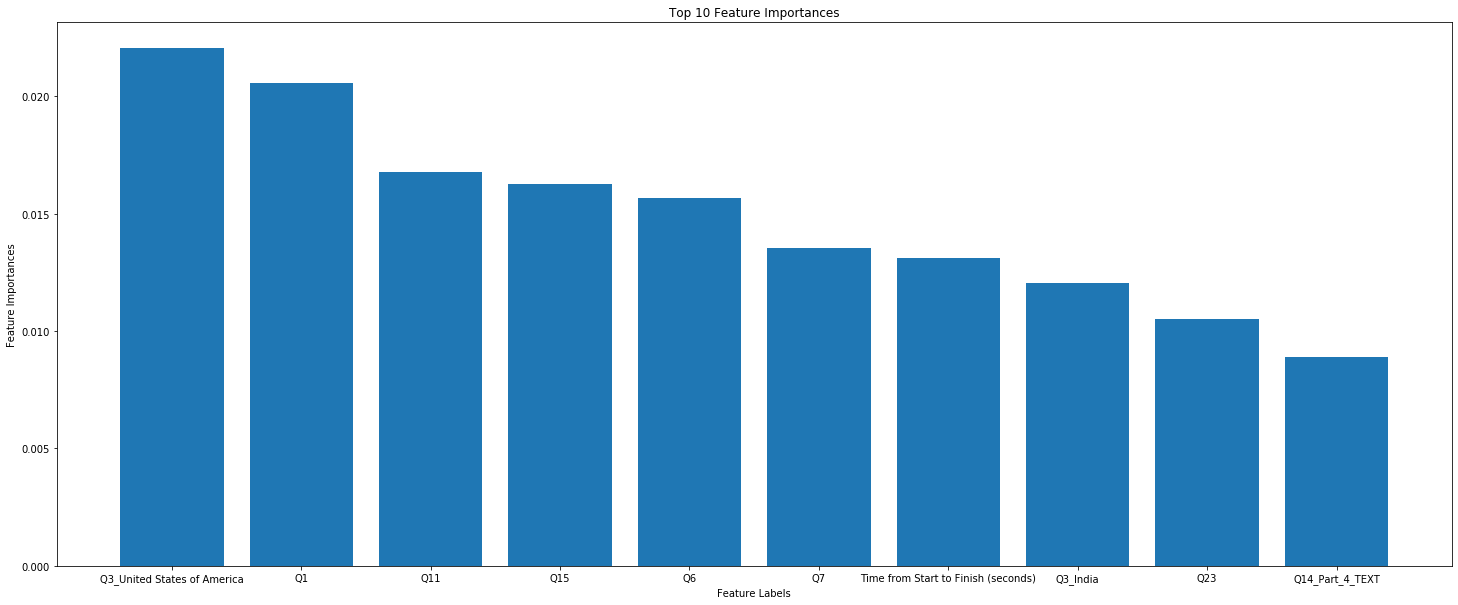

In [32]:
y_importance = np.array(sorted(list(zip(importance,df_clean)),reverse=True))[0:10,0].astype(float)
x_importance = np.array(sorted(list(zip(importance,df_clean)),reverse=True))[0:10,1]
f, ax = plt.subplots(figsize=(25,10))
plt.bar(x_importance, y_importance) 
plt.ylabel('Feature Importances') 
plt.xlabel('Feature Labels') 
plt.title('Top 10 Feature Importances') 
plt.show() 

### Feature Selection

Feature engineering is the process to extract new features that better represents the current dataset from raw data by using data mining techniques. New extracted features are robust in model fitting, resulting in an improved model performance. Therefore, feature engineering is a useful tool in machine learning.

The feature selection technique used in this question is Lasso regularization. Lasso regularization is able to shrink the weights of non-important features to zero by adding L1 penalty to those weights. The features that are not important according to Lasso can be removed to simplify the model and improve model performance.

After the feature selection using Lasso regularization, 108 features are passed into model implementation. 
<br />
(This number of features gives a reasonable running time in model implementation,so there is no need for further dimension reduction.)

In [33]:
sel_ = SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))
sel_.fit(df_clean_scaled, df_target)
selected_feat = df_clean.columns[(sel_.get_support())]
print("Selected features are:", selected_feat)
df_selected = sel_.transform(df_clean_scaled)
print("Number of selected features are:", df_selected.shape[1])

Selected features are: Index(['Q14_Part_1_TEXT',
       'Q9_Part_1_Analyze and understand data to influence product or business decisions',
       'Q9_Part_3_Build prototypes to explore applying machine learning to new areas',
       'Q9_Part_5_Experimentation and iteration to improve existing ML models',
       'Q12_Part_3_Reddit (r/machinelearning, r/datascience, etc)',
       'Q12_Part_6_YouTube (Cloud AI Adventures, Siraj Raval, etc)',
       'Q12_Part_8_Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)',
       'Q12_Part_10_Slack Communities (ods.ai, kagglenoobs, etc)',
       'Q13_Part_2_Coursera', 'Q13_Part_3_edX',
       ...
       'Q8_I do not know',
       'Q8_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q8_We recently started using ML methods (i.e., models in production for less than 2 years)',
       'Q19_Java', 'Q1', 'Q6', 'Q7', 'Q11', 'Q15', 'Q23'],
      dtype='object', length=108)
Number of selected

# Part 3: Model implementation

### Data splitting

Data is splitted into training and test sets in the scale of 7:3.

In [34]:
X, X_test, y, y_test = train_test_split(df_selected, df_target, random_state=42, test_size=0.3)

### Ordinal multi-class classification using logistic regression

To implement logistic regression algorithm, the ordinal multi-class classification problem is decomposed into multiple binary classification problems using the same algorithm as demonstrated in the figure below. The probability of belonging to each class is computed via subtracting the hypothesis from the current classification (h$\theta$i(x)) by the hypothesis from last classification (h$\theta$i-1(x)). For the probability of belonging to the first class , it is just equal to the hypothesis of the first binary classification since there is only the first class in the positive class. 

<img src="attachment:image.png" width="400">

For each binary classification, gradient decsent with L2 regularization is applied to the parameter $\theta$ to train the model. Since L1 regularization is already implemented in feature selection, we use L2 regularization in model implementation. The probability of belonging to each of the salary buckets is computed as the algorithm explained above. By selecting the maximum probability, it is able to predict the class label of data points.

Note: Some of the codes were modified according to the following reference about one vs rest binary classification method in multi-class classification. https://teddykoker.com/2019/06/multi-class-classification-with-logistic-regression-in-python/

#### Sigmoid function

In [35]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Gradient

In [36]:
def cost_grad(theta, x, y, C):
    h = sigmoid(x @ theta)
    m = len(y)
    
    # C: L2 regularization hyperparameter(Lambda)
    grad = 1 / m * ((y - h) @ x)  - 2 * theta * C
    return grad

#### Model training using gradient decsent

In [37]:
def fit(x, y, C, max_iter=10000, alpha=0.1):
    thetas = []
    classes = np.unique(y)

    for c in classes:
        #  binary classifications for ordinal multi-class classification
        binary_y = np.where(y <= c, 1, 0)
        theta = np.zeros(x.shape[1])
        
        for epoch in range(max_iter):
            grad = cost_grad(theta, x, binary_y, C)
            theta = theta + alpha * grad
            
        thetas.append(theta)
    return thetas, classes

#### Model prediction

In [38]:
def predict(classes, thetas, x):
    preds = []
    
    for xi in x:
        hx = np.zeros(len(thetas))
        
        # probability of belonging to each of the salary buckets
        for i in range(len(thetas)):
            if i == 0:
                hx[i] = sigmoid(xi @ thetas[i]) 
            else:
                hx[i] = sigmoid(xi @ thetas[i]) - sigmoid(xi @ thetas[i-1])
                
        preds.append(np.argmax(hx))
    return [classes[p] for p in preds]

#### Model evaluation: accuracy

In [39]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

### Cross-validation

K-fold cross validation is a common tool to generalize the model to an independent dataset, as so as to improve the overall performance of model. In 10-fold cross-validation, the training set is randomly splitted into 10 subsets in the equal size. For each step, a single subset is used for testing, and the remaining 9 subsets are used for training. This process iterates 10 time, and for each time, a different subset is selected for testing.

#### Note: From this step, the code cannot come up with results when running at https://labs.cognitiveclass.ai/ (i.e. the code running extremely slow). However, it works perfectly on Jupyter Notebook on my laptop with reasonable running time.

In [40]:
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, val_idx in kfold.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y.values[train_idx], y.values[val_idx]
    
    thetas, classes = fit(X_train, y_train, C=0)

    ACC = score(classes, thetas, X_val, y_val)

    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Accuracy: {}%".format(round(np.mean(accuracy),3)))
print ("Variance of Accuracy: {}%".format(round(np.var(accuracy),3)))

Fold 1: Accuracy: 0.347%
Fold 2: Accuracy: 0.369%
Fold 3: Accuracy: 0.352%
Fold 4: Accuracy: 0.366%
Fold 5: Accuracy: 0.363%
Fold 6: Accuracy: 0.345%
Fold 7: Accuracy: 0.376%
Fold 8: Accuracy: 0.371%
Fold 9: Accuracy: 0.359%
Fold 10: Accuracy: 0.332%
Average Accuracy: 35.806%
Variance of Accuracy: 1.699%


The average accuracy is 35.806%. The variance of accuracy is 1.699%. The results from 10-fold cross-validation better demonstrate the true performance of the model on training data. From the results, the low average accuracy indicates a high bias of model on training data, and a low variance of accuracy indicates a low variance of model on training data. In this case, the model is underfitting.

According to bias-variance tradeoff, as the model becomes more complex, coefficient estimates suffer from high variance. The optimal model that balances the bias and variance can be achieved at an optimal model complexity. In order to control the variance, regularization of coefficient is introduced to penalize the undesired large coefficients. By tuning the hyperparameter of regularization strength to the optimal using grid search, the best model with the optimal complexity can be determined as demonstrated in Question 4.

# Question 4: Model tuning

### Hyperparameter Tuning

By using grid search, different hyperparameters are passed into cross-validation in order to determine the optimal hyperparameters with the highest cross-validation score. It is a useful tool to find the optimal hyperparameters.

In [41]:
best_params = {}
best_accuracy = 0
best_std = 0

# Grid search for hyperparameter Lambda
for C in [0.00001, 0.0001, 0.001,0.005, 0.01,0.05,0.1]:
        
    accuracy = np.zeros(10)
    np_idx = 0
        
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y.values[train_idx], y.values[val_idx]

        thetas, classes = fit(X_train, y_train,C)

        ACC = score(classes, thetas, X_val, y_val)

        accuracy[np_idx] = ACC*100
        np_idx += 1
        
    if np.mean(accuracy) > best_accuracy:
        best_params = {'Lambda':C}
        best_accuracy = np.mean(accuracy)
        best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

{'Lambda': 1e-05}
Best Score: 35.818%(1.299%)


In the multi-class classification problem, we most care about that if the model could predict the classes correctly. Accuracy is the ratio of the number of correct predictions to the number of all predictions. Therefore, accuracy is a desired evaluation metric to measure the model performance. 

Based on results from hyperparameter tuning and cross-validation, the optimal value of $\lambda $ is 1e-05. The best cross validation accuracy is 35.818% with a standard deviation of 1.299%.

# Part 5: Testing & Discussion

### Model Testing

Here, the optimal model is implemented to make classification on the test set. 

In [42]:
X_train = X
y_train = y

# train the optimal model
thetas, classes = fit(X_train, y_train,C = 1e-05)

# prediction on test set
test_accuracy = score(classes, thetas, X_test, y_test)

# prediction on training set
train_accuracy = score(classes, thetas, X_train, y_train)

print("Test accuracy is: {}%".format(round(test_accuracy*100,3)))
print("Training accuracy is: {}%".format(round(train_accuracy*100,3)))

Test accuracy is: 35.44%
Training accuracy is: 37.156%


Test accuracy is 35.44% and training accuracy is 37.156%. As expected, the model performs sightly better on the training set compared to test set.

#### Accuracy vs. $\lambda$

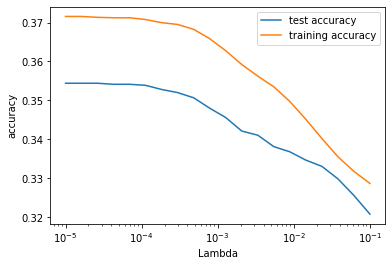

In [43]:
test_accuracy = np.zeros(20)
train_accuracy = np.zeros(20)
idx = 0

for C in np.logspace(-5,-1,num=20):
    thetas, classes = fit(X_train, y_train, C)

    # prediction on test set
    test_accuracy[idx] = score(classes, thetas, X_test, y_test)
    
    # prediction on training set
    train_accuracy[idx] = score(classes, thetas, X_train, y_train)
    idx+=1

C = np.logspace(-5,-1,num=20)

plt.semilogx(C,test_accuracy, label = 'test accuracy')
plt.semilogx(C,train_accuracy, label = 'training accuracy')
plt.xlabel('Lambda')
plt.ylabel('accuracy')
plt.legend()

As shown in the distribution, with the value of $\lambda$ being smaller, both training and test accuracy increase till convergency. The training accuracy does not continue increasing and test accuracy does not decrease again with the value of $\lambda$ further decreasing. This is because in the feature selection, L1 regularization eliminated the features that might cause overfiting of model, in such a case that both training and test accuracy converged at a small value of $\lambda$. 

#### Accuracy vs. maximum iteration

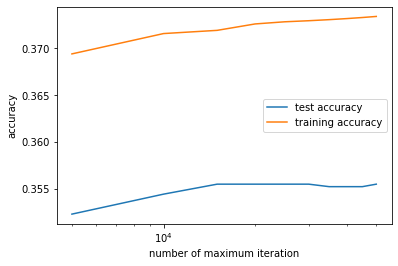

In [44]:
test_accuracy = np.zeros(10)
train_accuracy = np.zeros(10)
idx = 0

for i in [ 5000,10000, 15000, 20000, 25000 ,30000, 35000, 40000, 45000, 50000]:
    thetas, classes = fit(X_train, y_train, C = 1e-05, max_iter = i)

    # prediction on test set
    test_accuracy[idx] = score(classes, thetas, X_test, y_test)
    
    # prediction on training set
    train_accuracy[idx] = score(classes, thetas, X_train, y_train)
    idx+=1

i = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

plt.semilogx(i,test_accuracy, label = 'test accuracy')
plt.semilogx(i,train_accuracy, label = 'training accuracy')
plt.xlabel('number of maximum iteration')
plt.ylabel('accuracy')
plt.legend()

With an increasing number of maximum iterations, the gradient decsent is more likely to converge, so both training and test accuracy also increase as shown. A possible way to increase the accuracy of both training and test accuracy is to increase the maximum iteration in the gradient descent so as to reduce the bias introduced by the gradient descent algorithm. In addition, feature engineering can be used to extract new features that are able to better fit the model, so as to increase accuracy. Different algorithms, such as decision tree and random forest, are also able to improve the overall fit, since logistic regression is a relatively simple algorithm with low accuracy, while trees are suitable for classification problems.

Both training and test accuracy are low in the value, and training accuracy is much higher than test accuracy. By combining all discussions above, the model is likely to be underfitting.